# Assignment 1 

This assignment is based on the video discussed in module 1.

John Rauser ( 2014). Statistics Without the Agonizing Pain. Strata Hadoop 2014. Retrieved from https://www.youtube.com/watch?v=5Dnw46eC-0o

(Source: https://www.youtube.com/watch?v=5Dnw46eC-0o )




 
  
 

by Athithian Selvadurai

## Learning outcomes

- Use code to work with data
- Calculate basic statistical measures 
- Implement a data simulation by using resampling 


**Question 1**

1. Using the dataset from the video ( _mosquitos_data.csv_) in the folder, write Python code to:

    - Create side-by-side boxplots for the number of mosquitos in each group ( _beer vs water) 
    - What does the graph reveal about the data for both groups?  Is there an association between beer       consumption and attractiveness to mosquitos.
    - Calculate basic statistics measures for each group: Mean, median, standard deviation and explain the numbers.

2. Write code to implement the data simulation demonstrated in the above mentioned video.  Calculate the probability of obtaining the experiment outcome assuming no association between beer consumption.

## Hints

- Use pandas, matplotlib, or seaborn to plot boxplots in Python. 
- Label the graphs wherever applicable e.g, title, legend, units etc.





In [1]:
#your work here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.utils

**1. Using the dataset from the video ( _mosquitos_data.csv_) in the folder, write Python code to:**

- Create side-by-side boxplots for the number of mosquitos in each group ( _beer vs water) 

In [4]:
mos_df = pd.read_csv("mosquitos_data.csv")
mos_df.head()

,Response,Treatment
0,27,Beer
1,20,Beer
2,21,Beer
3,26,Beer
4,27,Beer


<function matplotlib.pyplot.show(*args, **kw)>

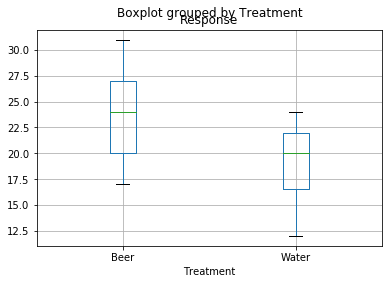

In [5]:
mos_df.boxplot(column = "Response", by = "Treatment")
plt.show

- What does the graph reveal about the data for both groups?  Is there an association between beer       consumption and attractiveness to mosquitos.

A: From the graph it does seem there is an association between beer consumption and attractiveness to mosquitos AS beer drinkers are overall higher than the water drinking group.

- Calculate basic statistics measures for each group: Mean, median, standard deviation and explain the numbers.

In [6]:
mos_beer = mos_df[mos_df["Treatment"]=="Beer"]
mos_water = mos_df[mos_df["Treatment"]=="Water"]

In [13]:
mos_beer.head()

,Response,Treatment
0,27,Beer
1,20,Beer
2,21,Beer
3,26,Beer
4,27,Beer


In [19]:
print("Mean of the Mosquito Beer data is: ", mos_beer.mean())

Mean of the Mosquito Beer data is:  Response    23.6
dtype: float64


In [20]:
print("Median of the Mosquito Beer data is: ", mos_beer.median())


Median of the Mosquito Beer data is:  Response    24.0
dtype: float64


In [26]:
print("Standard Deviation of the Mosquito Beer data is: ", mos_beer.std())
print("1SD between ", mos_beer.mean()-mos_beer.std(), " and ", mos_beer.mean()+mos_beer.std())

Standard Deviation of the Mosquito Beer data is:  Response    4.133199
dtype: float64
1SD between  Response    19.466801
dtype: float64  and  Response    27.733199
dtype: float64


The average of number of mosquitos attracted by the beer drinking group was 23.6, the middle value in our data was 24 and 68% of the data lies within around 19.5 and 27.7

In [14]:
mos_water.head()

,Response,Treatment
25,21,Water
26,22,Water
27,15,Water
28,12,Water
29,21,Water


In [22]:
print("Mean of the Mosquito Water data is: ", mos_water.mean())

Mean of the Mosquito Water data is:  Response    19.222222
dtype: float64


In [23]:
print("Median of the Mosquito Water data is: ", mos_water.median())

Median of the Mosquito Water data is:  Response    20.0
dtype: float64


In [27]:
print("Standard Deviation of the Mosquito Water data is: ", mos_water.std())
print("Data between ", mos_water.mean()-mos_water.std(), " and ", mos_water.mean()+mos_water.std())

Standard Deviation of the Mosquito Water data is:  Response    3.67112
dtype: float64
Data between  Response    15.551102
dtype: float64  and  Response    22.893343
dtype: float64


The average of number of mosquitos attracted by the water drinking group was 19.2, the middle value in our data was 20 and 68% of the data lies within around 15.6 and 22.9

**2. Write code to implement the data simulation demonstrated in the above mentioned video.  Calculate the probability of obtaining the experiment outcome assuming no association between beer consumption.**

In [ ]:
del mos_df['Treatment']

In [35]:
mean_shuffles = []
for i in range(10000):
    mos_shuffle = sklearn.utils.shuffle(mos_df)
    mos_shuffle_b = mos_shuffle.head(25) #25 values of the shuffled df will go to beer
    mos_shuffle_w = mos_shuffle.tail(18) # and 18 values of the shuffled df will go to water
    mean_diff = round(mos_shuffle_b.mean()-mos_shuffle_w.mean(), 1)
    mean_shuffles.append(mean_diff)
    
mean_shuffles = pd.DataFrame(data = mean_shuffles)
    


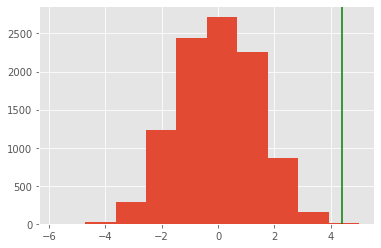

In [36]:
plt.style.use('ggplot')
plt.hist(mean_shuffles['Response'], bins = 10)
plt.axvline(x = 4.4, color = "green")
plt.show()

In [50]:
numer = mean_shuffles[mean_shuffles>=4.4].count()

In [51]:
denom = mean_shuffles.count()

In [54]:
prob = (numer/denom)*100
prob

Response    0.02
dtype: float64

As there was an extremely low chance that the difference in means was equal to greater than chance of being 4.4, it is EXTREMELY UNLIKELY to view 4.4 by chance. In fact within the scenario I ran, it showed that there was a 0.02% chance of running into the original experiment outcome sans treatment (ofc when you run the code the shuffles can easily change that value but by looking at the prob value you can find the percent probabilty of your run)